✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         2
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



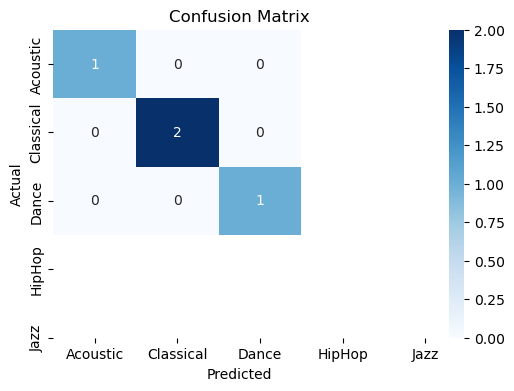

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


music_data = pd.read_csv(r'C:\Users\indra\OneDrive\Documents\music.csv')
X = music_data.drop(columns=['genre'])
y = music_data['genre']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


export_graphviz(model, out_file='music-recommender.dot',
                feature_names=['age', 'gender'],
                class_names=sorted(y.unique()),
                label='all',
                rounded=True,
                filled=True)
